In [1]:
import numpy as np
import pandas as pd
import cmath

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt

### Импорт данных

In [3]:
list_of_angles_TE = [-15, -12, -10, -9, -5, -2, 0, 2, 5, 8, 9, 10, 12, 14, 15, 17, 18, 19, 20, 21, 22, 24,
                     25, 27, 28, 30, 31, 32, 35, 37, 40, 41, 43, 45, 46, 47, 48, 49, 50, 52, 54, 55, 57, 60]

Файлы с TE-поляризацией

In [4]:
first_app = True
for angle in list_of_angles_TE:
    if np.abs(angle) < 10:
        if angle < 0:
            file = '-0' + str(np.abs(angle)) + 'deg.s1p'
        else:
            file = '0' + str(angle) + 'deg.s1p'
    else:
        file = str(angle) + 'deg.s1p'

    temp_8A = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\2oct\\inc_theta_0deg_scan30\\' + file,
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])

    temp_8A['Angle'] = angle
    if first_app:
        data_8A_TE = temp_8A.loc[temp_8A['Frequency'] == 25.0*1e9]
        first_app = False
    else:
        data_8A_TE = pd.concat([data_8A_TE, temp_8A.loc[temp_8A['Frequency'] == 25.0*1e9]], ignore_index=True)

In [5]:
data_8A_TE

,Frequency,ReS12,ImS12,Angle
0,2.500000e+10,-0.002816,0.003353,-15
1,2.500000e+10,-0.001858,0.003801,-12
2,2.500000e+10,0.002312,0.002010,-10
3,2.500000e+10,0.002293,0.000918,-9
4,2.500000e+10,0.002339,0.000872,-5
5,2.500000e+10,0.002327,0.000914,-2
6,2.500000e+10,0.000165,-0.000016,0
7,2.500000e+10,-0.003544,0.002547,2
8,2.500000e+10,-0.003612,0.002662,5
9,2.500000e+10,-0.003584,0.002471,8


Очистка памяти от ненужных переменных

In [6]:
del first_app
del temp_8A
del list_of_angles_TE
del angle
del file

In [7]:
data_8A_TE['s12']=data_8A_TE['ReS12']+1j*data_8A_TE['ImS12']

In [8]:
data_8A_TE = data_8A_TE.drop(['ReS12', 'ImS12'], axis=1)

Нормировка

In [10]:
norm = np.max(np.abs(data_8A_TE['s12']))

### Неудачная нормировка на экран

In [10]:
data_free_TE = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\2oct\\inc_theta_0deg_scan30\\free.s1p',
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])
data_screen_TE = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\2oct\\inc_theta_0deg_scan30\\screen.s1p',
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])

In [11]:
data_free_TE = data_free_TE.loc[data_free_TE['Frequency'] == 25.0*1e9]
data_screen_TE = data_screen_TE.loc[data_screen_TE['Frequency'] == 25.0*1e9]

In [12]:
data_free_TE['s12']=data_free_TE['ReS12']+1j*data_free_TE['ImS12']
data_screen_TE['s12']=data_screen_TE['ReS12']+1j*data_screen_TE['ImS12']

In [13]:
data_free_TE = data_free_TE.drop(['ReS12', 'ImS12'], axis=1)
data_screen_TE = data_screen_TE.drop(['ReS12', 'ImS12'], axis=1)

In [14]:
s12_free_TE = data_free_TE.loc[2500,'s12']
s12_screen_TE = data_screen_TE.loc[2500,'s12']

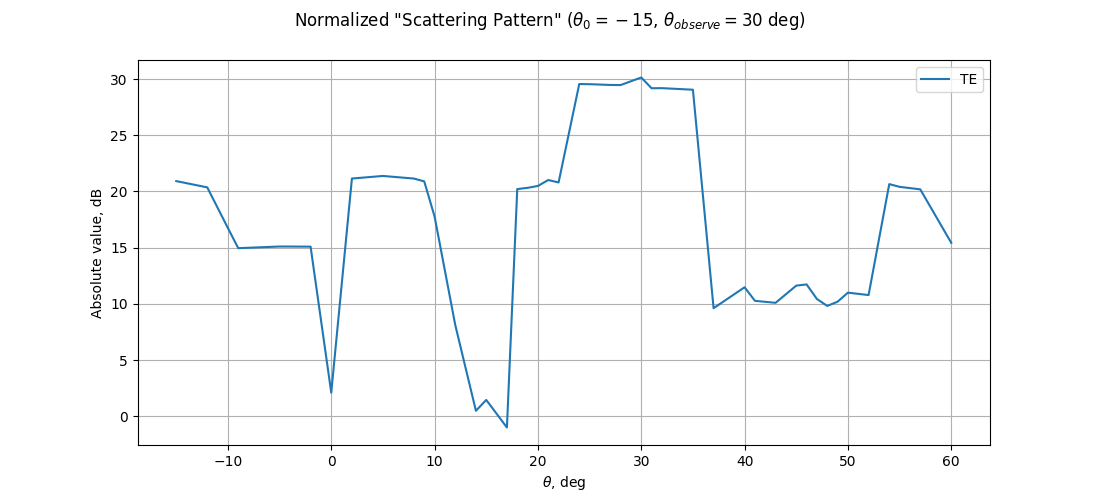

In [16]:
fig2 = plt.figure(figsize=(11,5))

ax_1 = fig2.add_subplot(111)
ax_1.plot(data_8A_TE['Angle'], 20*np.log10(((data_8A_TE['s12'] - s12_free_TE) /
                                            (s12_free_TE - s12_screen_TE)).apply(abs)), label='TE')
ax_1.set_xlabel(r'$\theta$, deg')
ax_1.set_ylabel('Absolute value, dB')
ax_1.legend()
ax_1.grid()


fig2.suptitle(r'Normalized "Scattering Pattern" ($\theta_0=-15$, $\theta_{observe}=30$ deg)')
plt.show()

### Сравнение с результатами CST

In [12]:
cst_angles = np.array([-20, -15, -10, -5, 0, 5, 7, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24, 25, 26, 27, 28, 29, 30, 35,
                       36, 38, 40, 45, 50, 55, 57, 60])

cst_pow = np.array([28.5884, 95.1513, 57.7261, 83.6022, 17.8732, 83.6022, 83.6022, 57.7261, 67.5463, 67.5463, 95.1513, 83.6022,
                    95.1513, 95.1513, 28.5884, 28.5884, 28.5884, 44.1228, 227.1825, 227.1825, 227.1825, 227.1825, 227.1825,
                    256.4511, 256.4511, 228.3496, 228.3496, 47.1117, 47.1117, 29.5922, 48.0627, 28.7341, 47.1117, 44.6492])

In [13]:
cst_pow = cst_pow / np.max(cst_pow)

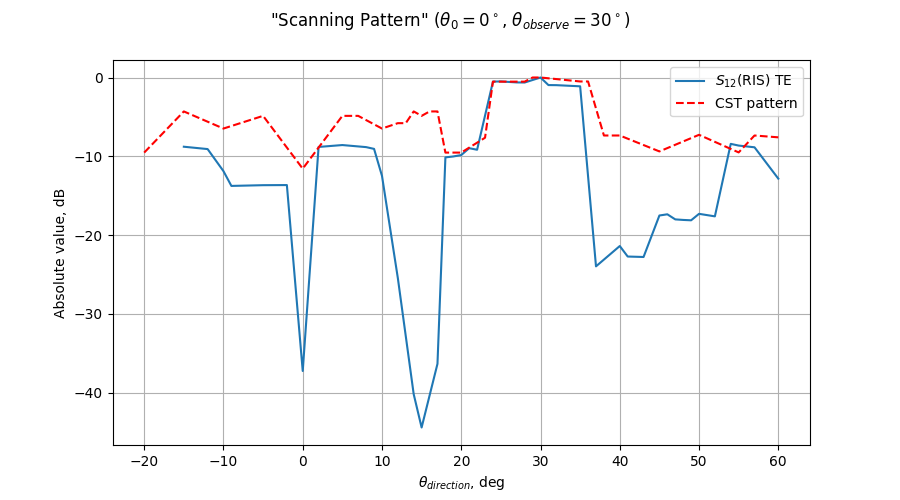

In [16]:
fig1 = plt.figure(figsize=(9,5))

ax_1 = fig1.add_subplot(111)
ax_1.plot(data_8A_TE['Angle'], 20*np.log10(data_8A_TE['s12'].apply(abs)/norm), label=r'$S_{12}$(RIS) TE')
ax_1.plot(cst_angles, 10*np.log10(cst_pow), color='r', linestyle='--', label=r'CST pattern')
ax_1.set_xlabel(r'$\theta_{direction}$, deg')
ax_1.set_ylabel('Absolute value, dB')
ax_1.legend()
ax_1.grid()


fig1.suptitle(r'"Scanning Pattern" ($\theta_0=0^\circ$, $\theta_{observe}=30^\circ$)')
plt.show()